In [3]:
import math
import meep as mp
from meep import mpb

num_bands = 4

k_points = [mp.Vector3(-0.5),          # Gamma
            mp.Vector3(0),       # X
            mp.Vector3(0.5),  # M
           ]          # Gamma

k_points = mp.interpolate(4, k_points)



geometry = []
Np = 15 ## number of repeating
for i in range (Np):
    geometry.append(mp.Block(mp.Vector3(0.5),material= mp.Medium(epsilon=13)))
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1))
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)
ms.run_te()

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (-7.5,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6.5,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5.5,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.5,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4.5,0,0)
          si

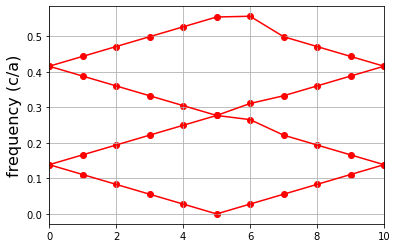

In [4]:
import matplotlib.pyplot as plt
freqs = ms.all_freqs
gaps = ms.gap_list
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='red')
ax.plot(freqs, color='red')
#ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
#ax.text(12, 0.04, 'bands', color='red', size=15)
points_in_between = (len(freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
#tick_labs = ['Γ', 'X', 'M', 'Γ']
#ax.set_xticks(tick_locs)
#ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)


plt.show()